# LAB_05

# Question-1(b)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('C:/Users/harsha/Desktop/DataMining_733/Week5_Lab/spam_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Assuming 'spam' is your target column
X = data.drop('spam', axis=1)
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the Naive Bayes classifier
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
#printing the accuracy of the classifier
print("Gaussian Naive Bayes Accuracy:", naive_bayes_accuracy)

Gaussian Naive Bayes Accuracy: 0.2


In [3]:
# Build a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)  # You can specify the number of neighbors (K) here
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set using KNN
knn_predictions = knn_classifier.predict(X_test)

# Calculate the accuracy of the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)

# printing the accuracy of the KNN classifier
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.6


In [4]:
data.head()

,word1,word2,word3,word4,spam
0,0,0,0,0,0
1,1,1,1,0,1
2,0,0,1,0,0
3,0,1,1,0,0
4,0,0,1,0,1


In [5]:
data.describe()

,word1,word2,word3,word4,spam
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.540000,0.580000,0.520000,0.360000,0.480000
std,0.503457,0.498569,0.504672,0.484873,0.504672
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   word1   50 non-null     int64
 1   word2   50 non-null     int64
 2   word3   50 non-null     int64
 3   word4   50 non-null     int64
 4   spam    50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


# Question-2(b)
#ROC curve and AUC score using Naive Bayes classifier

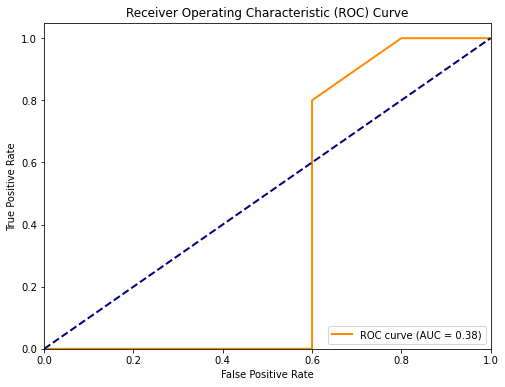

AUC Score: 0.38


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc


# Assuming 'spam' is your target column
X = data.drop('spam', axis=1)
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the AUC score
print("AUC Score:", roc_auc)


In [9]:
#ROC curve and AUC score using KNN classifier

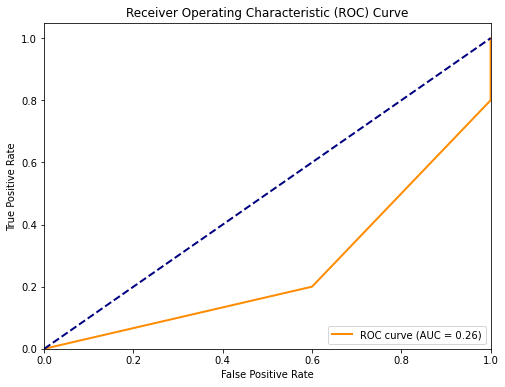

AUC Score: 0.26


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc


# Assuming 'spam' is your target column
X = data.drop('spam', axis=1)
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors (KNN) classifier
classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (K) as needed

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the AUC score
print("AUC Score:", roc_auc)
